In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3 import DQN

import sys
sys.path.append('../..')
from iai_models import otrl

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
Users of this version of Gym should be able to simply replace 'import gym' with 'import gymnasium as gym' in the vast majority of cases.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


In [2]:
env = Monitor(gym.make("LunarLander-v3", render_mode="rgb_array"))

In [3]:
models = {
    "OCT": otrl.OTRLPretrained(f"json/oct.json"),
    "OPT": otrl.OTRLPretrained(f"json/opt_shelf.json"),
    "OPCT": otrl.OTRLPretrained(f"json/opt.json"),
    "Brick": otrl.TunnelVisionPolicy(0, "Nothing")
}

In [4]:
n_eps = 100
bins = range(-800, 210, 50)

Evaluating Pretrained . . .


c:\Users\georg\miniconda3\envs\.conda_mit\Lib\site-packages\stable_baselines3\common\save_util.py:167: UserWarning: Could not deserialize object learning_rate. Consider using `custom_objects` argument to replace this object.
Exception: code expected at least 16 arguments, got 15
  warnings.warn(
c:\Users\georg\miniconda3\envs\.conda_mit\Lib\site-packages\stable_baselines3\common\save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at least 16 arguments, got 15
  warnings.warn(
c:\Users\georg\miniconda3\envs\.conda_mit\Lib\site-packages\stable_baselines3\common\save_util.py:167: UserWarning: Could not deserialize object exploration_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at least 16 arguments, got 15
  warnings.warn(
c:\Users\georg\miniconda3\envs\.conda_mit\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.p

Pretrained 153.5943039, 86.45082350744484
Evaluating OCT . . .
OCT -410.23819722, 194.29817023398732
Evaluating OPT . . .
OPT -481.72595415, 176.02269741894827
Evaluating OPCT . . .
OPCT -687.97784833, 62.60721213676095
Evaluating Brick . . .
Brick -128.63834068, 41.12788247687913


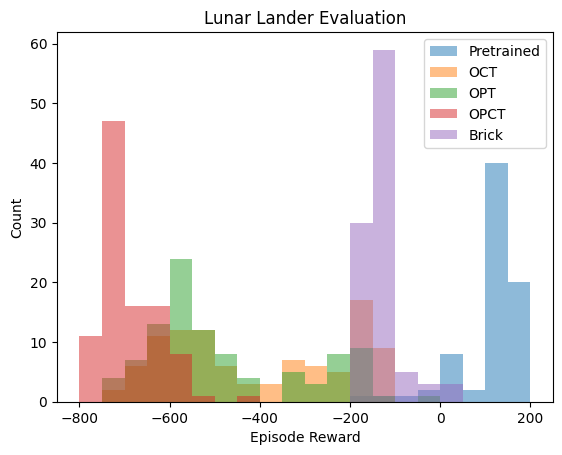

In [5]:
model_path = "../../rl-baselines3-zoo/rl-trained-agents/dqn/LunarLander-v2_1/LunarLander-v2.zip"
print("Evaluating Pretrained . . .")
rewards, lengths = evaluate_policy(
    DQN.load(model_path),
    env,
    n_eval_episodes=n_eps,
    return_episode_rewards=True
)
print(f"Pretrained {np.mean(rewards)}, {np.std(rewards)}")
plt.hist(rewards, bins=bins, alpha=0.5, label="Pretrained")

for name, mdl in models.items():
    print(f"Evaluating {name} . . .")
    rewards, lengths = mdl.evaluate(
        env,
        n_eval_episodes=n_eps,
        return_episode_rewards=True
    )
    print(f"{name} {np.mean(rewards)}, {np.std(rewards)}")
    plt.hist(rewards, bins=bins, alpha=0.5, label=name)

plt.legend()
plt.xlabel("Episode Reward")
plt.ylabel("Count")
plt.title("Lunar Lander Evaluation")
plt.show()

In [6]:
models["OCT"].render_episode(env, path="test.gif")

In [7]:
models["Brick"].render_episode(env, path="brick.gif")